In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#cargamos los datos de entrada
dataframe = pd.read_csv(r"soil_Rendimiento.csv")
print(dataframe.tail(10))

     Area    N  P205  K2SO4  CaO   MgO   Zn  Qfe  B  Rendimiento
310  0.86  273    76    260   30  37.0  8.0  2.7  3      16810.0
311  0.86  258    76    225   30  37.0  8.0  2.7  3       4100.0
312  1.59  171    47    157   20  31.0  8.0  2.0  4        601.0
313  1.59  175    47    177   20  40.0  8.0  2.0  4       2570.0
314  1.59  197    54    181   99  35.5  1.2  2.0  3      15960.0
315  1.59  197    54    171   99  38.0  1.2  2.0  3      20580.0
316  1.59  188    54    171   99  38.0  1.2  0.2  3      10114.0
317  1.59  210    78    170    8  35.0  8.0  2.7  3      21165.0
318  1.59  273    76    260   30  37.0  8.0  2.7  3      25010.0
319  1.59  258    76    225   30  37.0  8.0  2.7  3       5740.0


In [ ]:
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['Rendimiento'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo

In [ ]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (320, 9)
[4.22895671e-01 2.77559974e-01 1.11111111e-01 1.04325054e-01
 4.43302493e-02 3.86689534e-02 1.08805750e-03 2.09298930e-05
 2.14931549e-32]
suma: 1.0


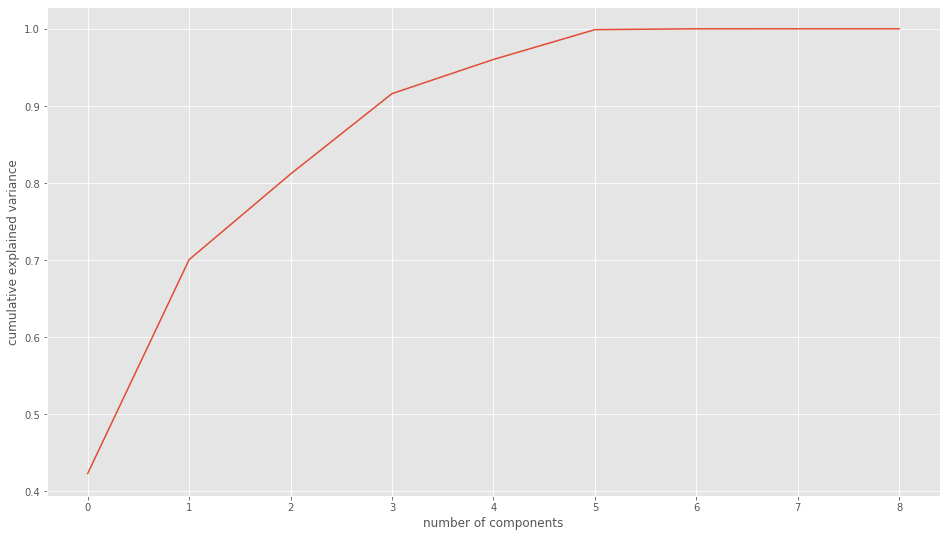

In [ ]:
# Para que grafique
%matplotlib inline 

# Tamaño y metodo
plt.rcParams['figure.figsize'] = 16, 9 # dimensiones de la figura
plt.style.use('ggplot')

# Graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()